In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt, SimpleExpSmoothing
from statsmodels.tsa.api import VAR

In [2]:
data  = pd.read_excel( "C:/Users/michelj8/Documents/GitHub/Dynamic-MESS/crime_states_adj_ohio.xlsx", 'MurderPop')
weight_matrix = pd.read_excel( "C:/Users/michelj8/Documents/GitHub/Dynamic-MESS/crime_states_adj_ohio.xlsx", 'Weight Matrix')

In [3]:
data = data.set_index('Year')
states = list(data.columns)

In [4]:
for state in states:
    model = Holt(data.pct_change(1).dropna()[state].values).fit(optimized=True)
    print(state, model.params['smoothing_level'], model.params['smoothing_slope'])

Indiana 7.829975780065993e-09 3.4697734092763818e-09
Kentucky 0.17213926459683254 0.1719756718814235
Michigan 0.09001984016445023 0.0
Ohio 0.08190676562291602 0.0
Pennsylvania 0.2631578947368421 0.2631578947368421
West Virginia 0.3157894736842105 0.3157894736842105


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [5]:
for state in states:
    model = Holt(data[state].values).fit(optimized=True)
    print(state, model.params['smoothing_level'], model.params['smoothing_slope'])

Indiana 0.9614093072098795 0.0
Kentucky 0.8438542572640703 0.0
Michigan 1.0 0.0
Ohio 1.0 0.0
Pennsylvania 0.9761383956335764 0.0
West Virginia 0.6480491008794752 0.0


In [6]:
for state in states:
    model = Holt(data[state].diff().values).fit(optimized=True)
    print(state, model.params['smoothing_level'], model.params['smoothing_slope'])

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\michelj8\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\michelj8\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\michelj8\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
C:\Users\michelj8\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:63: RuntimeWarning: invalid value encountered in less
  violated = (x < lb) | (x > ub)
C:\Users\michelj8\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:63: RuntimeWarning: invalid value encountered in greater
  violated = (x < lb) | (x > ub)
C:\

Indiana 0.05263157894736842 0.0001
Kentucky 0.05263157894736842 0.0001
Michigan 0.05263157894736842 0.0001
Ohio 0.05263157894736842 0.0001
Pennsylvania 0.05263157894736842 0.0001
West Virginia 0.05263157894736842 0.0001


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [7]:
model = VAR(data.pct_change(1).dropna()).fit()
model.params

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


,Indiana,Kentucky,Michigan,Ohio,Pennsylvania,West Virginia
const,0.003497,-0.011632,0.002720,0.003524,0.015497,0.016693
L1.Indiana,-0.150138,0.299976,0.133772,0.077938,-0.046623,0.118013
L1.Kentucky,-0.142071,-0.286767,-0.093446,0.062314,-0.070959,0.073645
L1.Michigan,0.562634,0.332794,-0.007280,0.258893,0.080727,-0.158905
L1.Ohio,0.155336,-0.221981,0.320262,-0.077538,0.432521,0.632839
L1.Pennsylvania,0.229705,0.101057,0.233120,0.177770,-0.224136,0.036761
L1.West Virginia,-0.177536,0.183080,-0.017189,-0.001429,0.059261,-0.361690


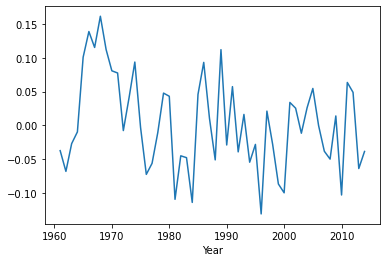

In [8]:
data.sum(axis = 1).pct_change().plot()

In [9]:
for state in states:
    print(state, data[state].pct_change().autocorr())

Indiana -0.0043811806049009454
Kentucky -0.26688417195665354
Michigan 0.12216042594427676
Ohio 0.1243055238793903
Pennsylvania -0.0650385572564456
West Virginia -0.3031812108420118


In [10]:
data['average'] = data[states].mean(axis =1).shift(1)
data.corr()

,Indiana,Kentucky,Michigan,Ohio,Pennsylvania,West Virginia,average
Indiana,1.000000,0.333275,0.687348,0.672404,0.802080,0.494467,0.792345
Kentucky,0.333275,1.000000,0.645329,0.774919,0.263323,0.736591,0.726077
Michigan,0.687348,0.645329,1.000000,0.835964,0.727053,0.670378,0.882507
Ohio,0.672404,0.774919,0.835964,1.000000,0.716865,0.813891,0.895278
Pennsylvania,0.802080,0.263323,0.727053,0.716865,1.000000,0.487091,0.751965
West Virginia,0.494467,0.736591,0.670378,0.813891,0.487091,1.000000,0.757776
average,0.792345,0.726077,0.882507,0.895278,0.751965,0.757776,1.000000


In [11]:
for state in states:
    state_data = data.pct_change(1).shift(1).copy()
    state_data[state] = data[state].pct_change(1)
    print(state)
    print(state_data.corr().loc[state])
    print()

Indiana
Indiana          1.000000
Kentucky         0.031493
Michigan         0.470601
Ohio             0.171523
Pennsylvania     0.305161
West Virginia   -0.148716
average          0.166785
Name: Indiana, dtype: float64

Kentucky
Indiana          0.282686
Kentucky         1.000000
Michigan         0.266637
Ohio             0.049636
Pennsylvania     0.140646
West Virginia    0.332486
average          0.137916
Name: Kentucky, dtype: float64

Michigan
Indiana          0.322102
Kentucky        -0.027723
Michigan         1.000000
Ohio             0.411534
Pennsylvania     0.350808
West Virginia    0.074983
average          0.095461
Name: Michigan, dtype: float64

Ohio
Indiana          0.143356
Kentucky         0.159981
Michigan         0.348276
Ohio             1.000000
Pennsylvania     0.273972
West Virginia    0.056571
average          0.112609
Name: Ohio, dtype: float64

Pennsylvania
Indiana          0.094463
Kentucky        -0.025980
Michigan         0.111273
Ohio             0.317384
P

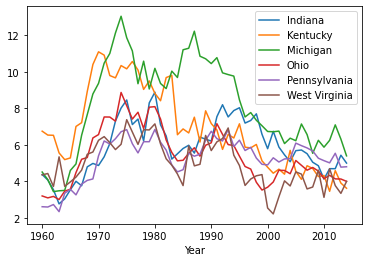

In [12]:
data[states].plot()

In [13]:
data[states].pct_change().dropna().div(data[states].pct_change().sum(axis = 1).dropna(), axis = 0).mean()

Indiana          1.374527
Kentucky        -0.048896
Michigan        -0.227554
Ohio             0.502775
Pennsylvania    -0.300997
West Virginia   -0.299854
dtype: float64

In [14]:
data[states].pct_change().mean()

Indiana          0.010080
Kentucky        -0.002188
Michigan         0.009228
Ohio             0.008990
Pennsylvania     0.016802
West Virginia    0.017703
dtype: float64

# Matrix Manipulation

In [15]:
def dim_matrix(matrix):
    return len(matrix),len(matrix[0])

def diag_to_matrix(array):
    length = len(array)
    matrix = np.zeros([length,length])

    for row in range(0, length):
        matrix[row][row] = array[row]

    return matrix

In [16]:
def spatial_spillover(mean,w_mat,phi,r):
    id_mat = diag_to_matrix(len(states)*[1])

    m_phi = id_mat - phi*w_mat
    m_inv_phi = np.linalg.inv(m_phi)

    A  = diag_to_matrix(len(states)*[1])
    A[-1] = len(states)*[1]
    
    prod_mat = np.dot(A, m_inv_phi)
    new_cov = np.dot(prod_mat, prod_mat.transpose())
    
    sig_12 = new_cov[:,-1][0:-1]
    sig_22 = new_cov[:,-1][-1]
    
    new_mean = np.dot(prod_mat,mean)

    mu_1 = new_mean[0:-1]
    mu_2 = new_mean[-1]

    updated_mean = mu_1 + sig_12*(1/sig_22)*(r-mu_2)
    updated_mean = np.append(updated_mean, r-updated_mean.sum() )
    return updated_mean

In [17]:
# def opt_spatial_ses(data,grid_size):
#     phi = np.linspace(0,1,grid_size)
    
#     Holt(model_data.loc[:year][state].values).fit(optimized = True)
    

In [18]:
w_mat = weight_matrix.set_index('W_Matrix').values

spatial_spillover([5,4,3,2,1,0],w_mat,0.95,15)

array([ 6.120642  ,  3.62227023,  5.22563249,  1.46971275, -0.54491661,
       -0.89334086])

# Forecasting Test

In [43]:
# model_data = data.pct_change(1).dropna().loc[1980:]
model_data = data.pct_change(1).dropna()


years = model_data.index

# Distinct Holt Models

In [44]:
holt_errors = []

for state in states:
    for year in years[10:]:
        year_index = np.where(year == years)[0][0]
        last_year = years[year_index - 1]
        
        prediction = Holt(model_data.loc[:last_year][state].values).fit(optimized = True).predict()[0]
        holt_errors.append(  model_data.loc[year,state] - prediction )

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to co

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. C

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. C

In [45]:
np.square(pd.DataFrame(holt_errors)).mean()

0    0.028976
dtype: float64

# Hierarchial

In [46]:
top_down_errors = []

agg_ts = model_data[states].sum(axis = 1)

for year in years[10:]:
    year_index = np.where(year == years)[0][0]
    last_year = years[year_index - 1]
    
    state_prop = (model_data.loc[:last_year,states].sum())/(model_data.loc[:last_year,states].sum().sum())
    actuals = model_data.loc[year,states]

    prediction = Holt(agg_ts.loc[:last_year].values).fit(optimized = True).predict()[0]
    year_errors = (actuals - (state_prop * prediction)).values
    top_down_errors.extend(year_errors)

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [47]:
np.square(pd.DataFrame(top_down_errors)).mean()

0    0.01878
dtype: float64

# VAR

In [65]:
var_errors = []

for year in years[10:]:
    year_index = np.where(year == years)[0][0]
    last_year = years[year_index - 1]
    model = VAR(model_data.loc[:last_year][states].values).fit()
    preds = model.forecast(model.y, steps=1)[0]
    
    var_errors.extend(model_data.loc[year,states].values  - preds)

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [66]:
np.square(pd.DataFrame(var_errors)).mean()

0    0.022909
dtype: float64

# Spatial Exp Smooth

In [50]:
weight_matrix = weight_matrix.set_index('W_Matrix').values

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

In [62]:
min_obj = 100000
min_alpha = 0.0
min_phi = 0.0
beta = 0.0 

for alpha in np.linspace(0,1,15):
    for phi in np.linspace(0,1,15):
        id_matrix = diag_to_matrix(len(states)*[1])
        n_phi = (1-phi)*id_matrix + phi*weight_matrix

        spatial_ses_errors = []

        for year in years:
            year_index = np.where(year==years)[0][0]

            if year_index == 0:
                level = model_data.loc[year,states]
                trend = np.array(len(states)*[0])

            else:
                old_level = level
                level = alpha*model_data.loc[year,states] + (1-alpha)*np.dot(n_phi,level+trend)
                trend = beta*(level - old_level) + (1-beta)*trend

            if (year_index > 9) & ( (year_index +1) < len(years)):
                next_year = years[year_index+1]
                spatial_ses_errors.append( (model_data.loc[next_year,states] - level).values[0] )
                
        obj = np.square(pd.DataFrame(spatial_ses_errors)).mean()[0]
        if obj < min_obj:
            min_obj, min_alpha, min_phi = obj, alpha, phi

print(min_alpha, min_phi)

0.07142857142857142 0.5714285714285714


In [63]:
alpha = 0.07142857142857142 
phi = 0.5714285714285714
beta = 0.0

id_matrix = diag_to_matrix(len(states)*[1])
n_phi = (1-phi)*id_matrix + phi*weight_matrix

spatial_ses_errors = []

for year in years:
    year_index = np.where(year==years)[0][0]
    
    if year_index == 0:
        level = model_data.loc[year,states]
        trend = np.array(len(states)*[0])
        
    else:
        old_level = level
        level = alpha*model_data.loc[year,states] + (1-alpha)*np.dot(n_phi,level+trend)
        trend = beta*(level - old_level) + (1-beta)*trend
        
    if (year_index > 9) & ( (year_index +1) < len(years)):
        next_year = years[year_index+1]
        spatial_ses_errors.append( (model_data.loc[next_year,states] - level).values[0] )

In [64]:
np.square(pd.DataFrame(spatial_ses_errors)).mean()

0    0.014903
dtype: float64

In [53]:
spatial_ses_errors = []
alpha = diag_to_matrix([0,.17,.1,.1,.26,.3])
one_minus_alpha = diag_to_matrix(1-np.array([0,.17,.1,.1,.26,.3]))
# alpha = diag_to_matrix(len(states)*[.05])
# one_minus_alpha = diag_to_matrix(len(states)*[.95])

phi = 0.35


id_matrix = diag_to_matrix(len(states)*[1])
n_phi = (1-phi)*id_matrix + phi*weight_matrix

for year in years:
    year_index = np.where(year==years)[0][0]
    
    if year_index == 0:
        level = model_data.loc[year,states]
        trend = np.array(len(states)*[0])
        
    else:
        old_level = level
        level = np.dot(alpha,model_data.loc[year,states]) + (np.dot(one_minus_alpha, np.dot(n_phi,level)))
        trend = np.dot(alpha,(level - old_level)) + np.dot(one_minus_alpha,trend)
        
    if (year_index > 9) & ( (year_index +1) < len(years)):
        next_year = years[year_index+1]
        spatial_ses_errors.append( (model_data.loc[next_year,states] - level).values[0] )
        
np.square(pd.DataFrame(spatial_ses_errors)).mean()

0    0.014469
dtype: float64

# SAR Based Top Down

In [54]:
phi = .2
sar_td_errors = []

agg_ts = model_data[states].sum(axis = 1)

for year in years[10:]:
    year_index = np.where(year==years)[0][0]
    last_year = years[year_index - 1]
    
    actuals = model_data.loc[year,states]
    old_means = model_data.loc[:last_year,states].mean().values

    prediction = Holt(agg_ts.loc[:last_year].values).fit(optimized = True).predict()[0]
    spatial_preds = spatial_spillover(old_means, weight_matrix, phi, prediction)
    
    sar_td_errors.extend((actuals - spatial_preds).values)

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [55]:
np.square(pd.DataFrame(sar_td_errors)).mean()

0    0.018781
dtype: float64

## Appendix: How well is agg_ts forecasted?

In [58]:
agg_errors = []
agg_ts = model_data[states].sum(axis = 1)

for year in years[10:]:
    year_index = np.where(year==years)[0][0]
    last_year = years[year_index - 1]
    
    actual = model_data.loc[year,states].sum()

    prediction = Holt(agg_ts.loc[:last_year].values).fit(optimized = True).predict()[0]
    agg_errors.append(actual - prediction)
    
np.square(pd.DataFrame(agg_errors)).mean()/6.0

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


0    0.035895
dtype: float64

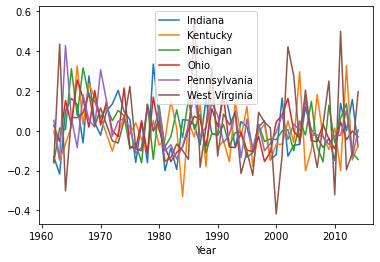

In [57]:
model_data[states].plot()